In [12]:
%matplotlib inline

import sys
sys.path.append("/home/caner/code/hawkes_bound")

import numpy as np
# from fasthawkes.em import hawkes_em, hawkes_perplexity
from fasthawkes.model.mv_exp import MultivariateExpHawkesProcess
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
!head -n15 example_data.csv

21,30
21,45
15,56
13,56
21,57
9,59
13,67
15,67
9,70
13,79
21,82
10,87
13,91
21,95
9,95


In [11]:
df = pd.read_csv("example_data.csv", header=None)
c, t = map(np.array, (df.iloc[:,0], df.iloc[:,1]))

In [14]:
proc = MultivariateExpHawkesProcess()
proc.fit(t.astype(np.float64), c)

(528,)
[  3.43583333e+03   3.35000000e+03   2.39416667e+03   2.41416667e+03
   1.69583333e+03   1.67083333e+03   3.11416667e+03   3.12333333e+03
   7.96666667e+03   7.70250000e+03   3.24583333e+03   3.40833333e+03
   6.74583333e+03   6.99166667e+03   2.47250000e+03   2.47416667e+03
   2.23583333e+03   2.07666667e+03   1.67000000e+03   1.53250000e+03
   6.94250000e+03   6.66916667e+03   4.12711845e-01   9.20301498e-01
   1.63211036e-01   2.92680319e-01   3.05417989e-01   1.62608296e-01
   1.70037128e-01   2.38370272e-01   4.25699818e-01   9.66045942e-01
   1.24462956e-01   4.56359230e-01   3.55957865e-01   8.62946868e-01
   9.29690233e-01   3.09733865e-01   3.26439275e-01   2.55117747e-01
   1.22595983e-01   4.16505736e-01   7.45049117e-02   2.70290483e-02
   5.35793495e-01   1.68360564e-02   8.07145289e-02   1.50293134e-02
   2.69338983e-02   6.87523482e-02   7.65682279e-03   7.59979414e-02
   3.83563577e-02   5.14647457e-02   7.68037128e-02   7.40514241e-02
   4.82168844e-02   3.74286

      fun: 500892755556.9622
 hess_inv: <528x528 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8197021.484375,  8197021.484375,  8203125.      ,  8203125.      ,
        8197021.484375,  8197021.484375,  8203125.      ,  8203125.      ,
        8197021.484375,  8197021.484375,  8203125.      ,  8203125.      ,
        8197021.484375,  8197021.484375,  8203125.      ,  8203125.      ,
        8197021.484375,  8197021.484375,  8203125.      ,  8203125.      ,
        8197021.484375,  8197021.484375,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,
              0.      ,        0.      ,        0.      ,        0.      ,


In [16]:
A, b, l = proc.get_params()

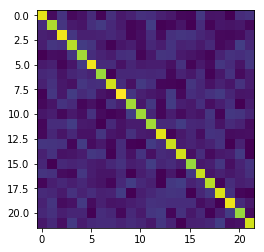

In [18]:
plt.imshow(A)

In [19]:
b

array([ 0.41271184,  0.9203015 ,  0.16321104,  0.29268032,  0.30541799,
        0.1626083 ,  0.17003713,  0.23837027,  0.42569982,  0.96604594,
        0.12446296,  0.45635923,  0.35595786,  0.86294687,  0.92969023,
        0.30973386,  0.32643927,  0.25511775,  0.12259598,  0.41650574,
        0.07450491,  0.02702905])